In [55]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
# Load the data
data = pd.read_csv('data/ACS_2019_STATS.csv')

# Increase the index by 2
data.index = data.index + 2

# Filter and drop columns that contain "Margin of Error"
drop_cols = data.filter(regex='Margin of Error')
data = data.drop(columns = drop_cols.columns)

# Transpose the dataframe
data_transposed = data.transpose()

# Display the first few rows of the transposed data
data_transposed.head()

,2,3,4,5,6,7,8,9,10,11,...,337,338,339,340,341,342,343,344,345,346
Label (Grouping),TOTAL NUMBER OF RACES REPORTED,Total population,One race reported,Two races reported,Three races reported,Four or more races reported,SEX AND AGE,Total population,TP Male,TP Female,...,OUPRe - Occupied units paying rent (excluding ...,OUPR Less than 30 percent income,OUPR 30 percent or more income,GROSS RENT,OUPR - Occupied units paying rent,Median gross rent (dollars),COMPUTERS AND INTERNET USE,Occupied housing units (Same as Total Househol...,With a computer,With a broadband Internet subscription
"Congressional District 1 (116th Congress), Alabama!!Total population!!Estimate",NaN,"717,438",97.9%,1.9%,0.2%,0.0%,NaN,"717,438",48.2%,51.8%,...,"66,285",47.6%,52.4%,NaN,"70,269",872,NaN,"268,033",90.0%,79.6%
"Congressional District 2 (116th Congress), Alabama!!Total population!!Estimate",NaN,"674,920",98.1%,1.8%,0.1%,0.0%,NaN,"674,920",48.2%,51.8%,...,"79,064",56.7%,43.3%,NaN,"80,966",815,NaN,"262,180",89.3%,81.7%
"Congressional District 3 (116th Congress), Alabama!!Total population!!Estimate",NaN,"717,896",98.3%,1.5%,0.2%,0.0%,NaN,"717,896",48.7%,51.3%,...,"70,294",55.0%,45.0%,NaN,"72,254",771,NaN,"279,236",89.6%,80.7%
"Congressional District 4 (116th Congress), Alabama!!Total population!!Estimate",NaN,"687,453",98.2%,1.7%,0.1%,0.0%,NaN,"687,453",49.1%,50.9%,...,"57,766",56.4%,43.6%,NaN,"59,355",661,NaN,"262,865",85.6%,78.3%


In [3]:
dummy_columns = [("Dummy1", 0), ("Dummy2", 1)] # column name and position

for col_name, position in dummy_columns:
    data_transposed.insert(position, col_name, np.nan)

# Display the first few rows of the updated DataFrame
data_transposed.head()


,Dummy1,Dummy2,2,3,4,5,6,7,8,9,...,337,338,339,340,341,342,343,344,345,346
Label (Grouping),NaN,NaN,TOTAL NUMBER OF RACES REPORTED,Total population,One race reported,Two races reported,Three races reported,Four or more races reported,SEX AND AGE,Total population,...,OUPRe - Occupied units paying rent (excluding ...,OUPR Less than 30 percent income,OUPR 30 percent or more income,GROSS RENT,OUPR - Occupied units paying rent,Median gross rent (dollars),COMPUTERS AND INTERNET USE,Occupied housing units (Same as Total Househol...,With a computer,With a broadband Internet subscription
"Congressional District 1 (116th Congress), Alabama!!Total population!!Estimate",NaN,NaN,NaN,"717,438",97.9%,1.9%,0.2%,0.0%,NaN,"717,438",...,"66,285",47.6%,52.4%,NaN,"70,269",872,NaN,"268,033",90.0%,79.6%
"Congressional District 2 (116th Congress), Alabama!!Total population!!Estimate",NaN,NaN,NaN,"674,920",98.1%,1.8%,0.1%,0.0%,NaN,"674,920",...,"79,064",56.7%,43.3%,NaN,"80,966",815,NaN,"262,180",89.3%,81.7%
"Congressional District 3 (116th Congress), Alabama!!Total population!!Estimate",NaN,NaN,NaN,"717,896",98.3%,1.5%,0.2%,0.0%,NaN,"717,896",...,"70,294",55.0%,45.0%,NaN,"72,254",771,NaN,"279,236",89.6%,80.7%
"Congressional District 4 (116th Congress), Alabama!!Total population!!Estimate",NaN,NaN,NaN,"687,453",98.2%,1.7%,0.1%,0.0%,NaN,"687,453",...,"57,766",56.4%,43.6%,NaN,"59,355",661,NaN,"262,865",85.6%,78.3%


In [4]:
data_transposed.to_csv('census_stats_transposed.csv')

In [5]:
df = data_transposed

def convert_percentages_to_raw(df, raw_cols, percent_ranges):
    for raw_col, (start, end) in zip(raw_cols, percent_ranges):
        for i in range(1, len(df)):
            try:
                if isinstance(df.iloc[i, raw_col], str):
                    total_population = float(df.iloc[i, raw_col].replace(',', ''))
                else:  # if it's already a number, use it directly
                    total_population = df.iloc[i, raw_col]
                df.iloc[i, raw_col] = total_population  # Replacing the string in raw_col with its corresponding integer value
            except ValueError:
                print(f"Unexpected value in column {raw_col}, row {i}: {df.iloc[i, raw_col]}")
                continue

            for j in range(start, end + 1):  # Adding 1 to 'end' as range in Python is exclusive of the end index
                try:
                    percentage = float(df.iloc[i, j].strip('%'))
                except ValueError:
                    print(f"Unexpected value in column {j}, row {i}: {df.iloc[i, j]}")
                    continue

                raw_total = float((percentage / 100) * total_population)
                df.iloc[i, j] = raw_total
    return df


# redefining function to find out where the error is

In [6]:
def convert_percentages_to_raw(df, raw_cols, percent_ranges):
    for raw_col, (start, end) in zip(raw_cols, percent_ranges):
        for i in range(1, len(df)):
            try:
                if isinstance(df.iloc[i, raw_col], str):
                    total_population = float(df.iloc[i, raw_col].replace(',', ''))
                else:  # if it's already a number, use it directly
                    total_population = df.iloc[i, raw_col]
                df.iloc[i, raw_col] = total_population  # Replacing the string in raw_col with its corresponding integer value
            except ValueError:
                print(f"ValueError - Unexpected value in column {raw_col}, row {i}: {df.iloc[i, raw_col]}")
                continue

            for j in range(start, end + 1):  # Adding 1 to 'end' as range in Python is exclusive of the end index
                try:
                    if isinstance(df.iloc[i, j], str):  # Add this check
                        percentage = float(df.iloc[i, j].strip('%'))
                    else:  # if it's already a number, use it directly
                        percentage = df.iloc[i, j]
                except ValueError:
                    print(f"ValueError - Unexpected value in column {j}, row {i}: {df.iloc[i, j]}")
                    continue
                except AttributeError:
                    print(f"AttributeError - Unexpected value in column {j}, row {i}: {df.iloc[i, j]}")
                    continue

                raw_total = float((percentage / 100) * total_population)
                df.iloc[i, j] = raw_total
    return df


In [7]:
# Raw total columns for which percentages are being taken
raw_cols = [3, 3, 3, 26, 29, 32, 35, 38, 42, 49, 66, 72, 78, 85, 91, 94, 98, 104, 98, 107, 116, 117,
            
            120, 123, 125, 127, 129, 132, 141, 144, 147, 150, 144, 144, 166, 171, 171, 179, 
            186, 195, 201, 207, 195, 195, 
            
            49, 49, 49, 49, 49, 49, 248, 248, 248, 123, 248, 3, 3, 49, 49, 49, 49, 49, 328, 337, 49
           ] 

# column range tuples associated with raw value columns
percent_ranges = [(4, 7), (10, 20), (22,25), (27,28), (30,31), (33,34),
                 (36,37), (39,40), (43,47), (50,62), (67,71), (73,77),
                 (79,83),(86,90), (92,93), (95,96), (99,104), (105, 106), 
                 (107,107), (108,109), (117,117), (118,118),
                 
                 (121,121), (124,124), (126, 126), (128,128), (130,130), (133,139),
                 (142,143), (145,146), (148,149), (151,152), (154,156), (159, 164), (167,169), (172,175),(177,178),
                 (180,183), (187,192), (196,200), (202,206), (208,212), (215,227), (230,233),
                 
                 (237,237), (239,239), (241,241), (243,243), (245,245), (247,247), (250,250), (252,252), (254,254),
                 (269,271), (273,273), (282,283), (288,289), (294,295), (300,303), (315,316), (319,322), (325,326), 
                 (329,330), (338,339), (345,346)
                 ]

df1 = convert_percentages_to_raw(df, raw_cols, percent_ranges)


In [8]:
df_stats = df1

In [9]:
df1.to_csv('datacheckfull.csv')

In [10]:
# Columns to be removed
columns_to_remove = [0,1,2, 8,9, 41, 48, 65, 84, 97, 110, 115, 119, 122, 131, 140, 157, 
                     165, 170, 185, 194, 195, 213, 214, 228, 229, 234, 235, 256, 258, 261, 264, 267, 
                     268, 272, 274,275,276, 277, 278, 279, 280, 281, 284, 285, 286, 287, 290, 
                     291, 292, 293, 298, 299, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 
                     314, 317, 318, 323, 324, 327, 331, 336, 340, 343, 344]

# Drop the specified columns
df_stats = df1.drop(df.columns[columns_to_remove], axis=1)

# Display the first few rows of the resulting dataframe
df_stats.head()


,3,4,5,6,7,10,11,12,13,14,...,333,334,335,337,338,339,341,342,345,346
Label (Grouping),Total population,One race reported,Two races reported,Three races reported,Four or more races reported,TP Male,TP Female,TP Under 5 years,TP 5 to 17 years,TP 18 to 24 years,...,Median value (dollars),Median selected monthly owner costs with a mor...,Median selected monthly owner costs without a ...,OUPRe - Occupied units paying rent (excluding ...,OUPR Less than 30 percent income,OUPR 30 percent or more income,OUPR - Occupied units paying rent,Median gross rent (dollars),With a computer,With a broadband Internet subscription
"Congressional District 1 (116th Congress), Alabama!!Total population!!Estimate",717438.0,702371.802,13631.322,1434.876,0.0,345805.116,371632.884,43046.28,118377.27,58112.478,...,"160,600","1,220",365,66285.0,31551.66,34733.34,"70,269",872,241229.7,213354.268
"Congressional District 2 (116th Congress), Alabama!!Total population!!Estimate",674920.0,662096.52,12148.56,674.92,0.0,325311.44,349608.56,41170.12,110686.88,60742.8,...,"135,500","1,092",347,79064.0,44829.288,34234.712,"80,966",815,234126.74,214201.06
"Congressional District 3 (116th Congress), Alabama!!Total population!!Estimate",717896.0,705691.768,10768.44,1435.792,0.0,349615.352,368280.648,38766.384,116299.152,76096.976,...,"144,700","1,141",350,70294.0,38661.7,31632.3,"72,254",771,250195.456,225343.452
"Congressional District 4 (116th Congress), Alabama!!Total population!!Estimate",687453.0,675078.846,11686.701,687.453,0.0,337539.423,349913.577,40559.727,114117.198,54308.787,...,"132,800","1,066",342,57766.0,32580.024,25185.976,"59,355",661,225012.44,205823.295


In [11]:
df_stats.to_csv('2019_ACS_Stats_Dropped_Columns.csv')

In [12]:
# reload csv after checking
df_new = pd.read_csv('data/2019_ACS_Stats_Dropped_Columns.csv')

# rename the columns to combine their number label and name label
new_column_names = [f"{i}. {name}" for i, name in zip(df_new.iloc[0, :].index, df_new.iloc[0, :])]
df_new.columns = new_column_names

# remove the non-combined label row
df_new = df_new.iloc[1:, :]

# convert all columns to numeric types if possible
df_new = df_new.apply(pd.to_numeric, errors='ignore')

# Columns that need to be converted from percentages to fractions
percentage_columns = ['114. UMW15_50 as a percent of all women with a birth in the past 12 months', 
                      '176. Total\xa0Unemployment Rate', 
                      '184. Female Unemployment Rate']

# convert percentages to fractions
for col in percentage_columns:
    df_new[col] = df_new[col].str.rstrip('%').astype('float') / 100.0

# identify remaining object columns
remaining_object_columns = df_new.select_dtypes(include=['object']).columns

# exclude the first column (congressional districts)
remaining_object_columns = remaining_object_columns[1:]

# convert remaining object columns to floats, after removing commas
for col in remaining_object_columns:
    df_new[col] = df_new[col].str.replace(',', '').astype('float')

# Check the dtypes of the columns again
df_new.dtypes.value_counts()


float64    275
object       1
Name: count, dtype: int64

In [13]:
df_new.to_csv('data/2019_ACS_Stats_Final.csv')

# CENSUS FILE ON RACE DEMOGRAPHICS

In [14]:
data = pd.read_csv('data/ACSCP1Y2019.CP05-2023-07-25T013625.csv')

# Set the first column as the index
data.set_index(data.columns[0], inplace=True)

data = data.filter(regex='2019 Estimate')

# Transpose the dataframe
data_transposed = data.transpose()

dummy_columns = [("Dummy1", 0), ("Dummy2", 1)]  # List of tuples, each containing column name and position

for col_name, position in dummy_columns:
    data_transposed.insert(position, col_name, np.nan)

df2 = data_transposed
# Display the first few rows of the transposed data
data.head()

,"Congressional District 1 (116th Congress), Alabama!!2019 Estimate","Congressional District 2 (116th Congress), Alabama!!2019 Estimate","Congressional District 3 (116th Congress), Alabama!!2019 Estimate","Congressional District 4 (116th Congress), Alabama!!2019 Estimate","Congressional District 5 (116th Congress), Alabama!!2019 Estimate","Congressional District 6 (116th Congress), Alabama!!2019 Estimate","Congressional District 7 (116th Congress), Alabama!!2019 Estimate","Congressional District (at Large) (116th Congress), Alaska!!2019 Estimate","Congressional District 1 (116th Congress), Arizona!!2019 Estimate","Congressional District 2 (116th Congress), Arizona!!2019 Estimate",...,"Congressional District 1 (116th Congress), Wisconsin!!2019 Estimate","Congressional District 2 (116th Congress), Wisconsin!!2019 Estimate","Congressional District 3 (116th Congress), Wisconsin!!2019 Estimate","Congressional District 4 (116th Congress), Wisconsin!!2019 Estimate","Congressional District 5 (116th Congress), Wisconsin!!2019 Estimate","Congressional District 6 (116th Congress), Wisconsin!!2019 Estimate","Congressional District 7 (116th Congress), Wisconsin!!2019 Estimate","Congressional District 8 (116th Congress), Wisconsin!!2019 Estimate","Congressional District (at Large) (116th Congress), Wyoming!!2019 Estimate","Resident Commissioner District (at Large) (116th Congress), Puerto Rico!!2019 Estimate"
Label (Grouping),,,,,,,,,,,,,,,,,,,,,
SEX AND AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total population,"717,438","674,920","717,896","687,453","735,858","699,605","670,015","731,545","782,088","733,197",...,"721,691","773,663","723,169","704,146","733,314","715,828","714,544","736,079","578,759","3,193,694"
Male,48.2%,48.2%,48.7%,49.1%,48.8%,48.1%,47.2%,52.0%,51.0%,49.5%,...,49.6%,49.6%,50.3%,48.1%,49.3%,50.0%,50.4%,49.9%,51.1%,47.5%
Female,51.8%,51.8%,51.3%,50.9%,51.2%,51.9%,52.8%,48.0%,49.0%,50.5%,...,50.4%,50.4%,49.7%,51.9%,50.7%,50.0%,49.6%,50.1%,48.9%,52.5%
Sex ratio (males per 100 females),93.1,93.2,94.9,96.3,95.2,92.6,89.2,108.4,104.1,97.9,...,98.5,98.6,101.4,92.8,97.4,100.0,101.8,99.7,104.7,90.4


In [15]:
df2.shape

(437, 96)

In [16]:
df2 = data_transposed #just checking column alignment
df2.iloc[:5,36]

Congressional District 1 (116th Congress), Alabama!!2019 Estimate    717,438
Congressional District 2 (116th Congress), Alabama!!2019 Estimate    674,920
Congressional District 3 (116th Congress), Alabama!!2019 Estimate    717,896
Congressional District 4 (116th Congress), Alabama!!2019 Estimate    687,453
Congressional District 5 (116th Congress), Alabama!!2019 Estimate    735,858
Name:     Total population, dtype: object

In [17]:
#same function as before but now including first row, and replaceing Censu Bureau 
#placeholder "N" values with 0

def convert_percentages_to_raw_race(df, raw_cols, percent_ranges): 
    for raw_col, (start, end) in zip(raw_cols, percent_ranges):
        for i in range(len(df)):
            try:
                if isinstance(df.iloc[i, raw_col], str):
                    if df.iloc[i, raw_col] == 'N':  # Handle special 'N' cases
                        total_population = 0.0
                    else:
                        total_population = float(df.iloc[i, raw_col].replace(',', ''))
                else:  # if it's already a number, use it directly
                    total_population = df.iloc[i, raw_col]
                df.iloc[i, raw_col] = total_population  # Replacing the string in raw_col with its corresponding integer value
            except ValueError:
                print(f"ValueError - Unexpected value in column {raw_col}, row {i}: {df.iloc[i, raw_col]}")
                continue

            for j in range(start, end + 1):  # Adding 1 to 'end' as range in Python is exclusive of the end index
                try:
                    if isinstance(df.iloc[i, j], str):  # Add this check
                        if df.iloc[i, j] == 'N':  # Handle special 'N' cases
                            percentage = 0.0
                        else:
                            percentage = float(df.iloc[i, j].strip('%'))
                    else:  # if it's already a number, use it directly
                        percentage = df.iloc[i, j]
                except ValueError:
                    print(f"ValueError - Unexpected value in column {j}, row {i}: {df.iloc[i, j]}")
                    continue
                except AttributeError:
                    print(f"AttributeError - Unexpected value in column {j}, row {i}: {df.iloc[i, j]}")
                    continue

                raw_total = float((percentage / 100) * total_population)
                df.iloc[i, j] = raw_total
    return df


In [18]:
# Raw total columns for which percentages are being taken
raw_cols = [36, 37, 37, 37, 38, 75, 93] 

# column range tuples associated with raw value columns
percent_ranges = [(37,38), (40,42), (47,55), (60,60), (62,65), (76,80), (94,95)]

df_race = convert_percentages_to_raw_race(df2, raw_cols, percent_ranges)


In [19]:
df_race.iloc[:5,48:54] #Checking this N situation

Label (Grouping),Asian Indian,Chinese,Filipino,Japanese,Korean,Vietnamese
"Congressional District 1 (116th Congress), Alabama!!2019 Estimate",1404.743604,1404.743604,2107.115406,0.0,0.0,2809.487208
"Congressional District 2 (116th Congress), Alabama!!2019 Estimate",1324.19304,662.09652,1324.19304,662.09652,2648.38608,0.0
"Congressional District 3 (116th Congress), Alabama!!2019 Estimate",705.691768,3528.45884,705.691768,0.0,6351.225912,0.0
"Congressional District 4 (116th Congress), Alabama!!2019 Estimate",0.0,0.0,0.0,0.0,0.0,0.0
"Congressional District 5 (116th Congress), Alabama!!2019 Estimate",2866.902768,3583.62846,716.725692,0.0,1433.451384,1433.451384


In [20]:
df2.to_csv('datacheckfullrace.csv')

df_race = pd.read_csv('datacheckfullrace.')

# Set the first column as the index
df_race.set_index(df_race.columns[0], inplace=True)


In [21]:
df_race.columns

Index(['Dummy1', 'Dummy2', 'SEX AND AGE', '    Total population',
       '        Male', '        Female',
       '        Sex ratio (males per 100 females)', '        Under 5 years',
       '        5 to 9 years', '        10 to 14 years',
       '        15 to 19 years', '        20 to 24 years',
       '        25 to 34 years', '        35 to 44 years',
       '        45 to 54 years', '        55 to 59 years',
       '        60 to 64 years', '        65 to 74 years',
       '        75 to 84 years', '        85 years and over',
       '        Median age (years)', '        Under 18 years',
       '        16 years and over', '        18 years and over',
       '        21 years and over', '        62 years and over',
       '        65 years and over', '        18 years and over',
       '            Male', '            Female',
       '            Sex ratio (males per 100 females)',
       '        65 years and over', '            Male', '            Female',
       '            

In [22]:
# Provided column indices are 0-indexed
columns_to_keep = [6, 30, 34, 40, 41, 42, 47, 48, 49, 50, 51, 52, 
                   53, 54, 55, 60, 62, 63, 64, 65, 75, 76, 77, 78, 
                   79, 80, 93, 94, 95]

# Keep the specified columns
df_race = df_race[df_race.columns[columns_to_keep]]

# Get the list of column names in the filtered dataframe
df_race.columns


Index(['        Sex ratio (males per 100 females)',
       '            Sex ratio (males per 100 females)',
       '            Sex ratio (males per 100 females)',
       '            Sex ratio (males per 100 females)',
       '            Sex ratio (males per 100 females)', '            White',
       '            Black or African American',
       '            American Indian and Alaska Native', '            Asian',
       '                Asian Indian', '                Chinese',
       '                Filipino', '                Japanese',
       '                Korean', '                Vietnamese',
       '                Other Asian',
       '            Native Hawaiian and Other Pacific Islander',
       '            Some other race',
       '            White and Black or African American',
       '            White and American Indian and Alaska Native',
       '            White and Asian',
       '            Black or African American and American Indian and Alaska Native

In [23]:
df_race.to_csv('2019_race_fix_labels.csv')

In [24]:
df1 = pd.read_csv('data/data/ACS_Stats.csv')

In [25]:
df2 = pd.read_csv('data/data/ACS_Race.csv')

In [26]:
# State Mapping
states = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

def format_district(district):
    # Extract the state name and district number from the district string
    match = re.search(r'Congressional District (\d+|\(at Large\)) \(116th Congress\), ([A-Za-z\s]+)', district)
    if match:
        district_num, state_name = match.groups()
        # Convert the district number to 'AL' for 'at large' districts
        if district_num == '(at Large)':
            district_num = 'AL'
        else:
            district_num = district_num.zfill(2)  # Pad single digit numbers with a leading zero
        # Convert the state name to an abbreviation
        state_abbr = states.get(state_name.strip(), state_name)
        # Return the formatted district name
        return f'{state_abbr}-{district_num}'

# Apply the function to the 'District' column in both dataframes
df1['Formatted_District'] = df1['District'].apply(format_district)
df2['Formatted_District'] = df2['District'].apply(format_district)

df1[['District', 'Formatted_District']].head(10), df2[['District', 'Formatted_District']].head()


(                                            District Formatted_District
 0  Congressional District 1 (116th Congress), Ala...              AL-01
 1  Congressional District 2 (116th Congress), Ala...              AL-02
 2  Congressional District 3 (116th Congress), Ala...              AL-03
 3  Congressional District 4 (116th Congress), Ala...              AL-04
 4  Congressional District 5 (116th Congress), Ala...              AL-05
 5  Congressional District 6 (116th Congress), Ala...              AL-06
 6  Congressional District 7 (116th Congress), Ala...              AL-07
 7  Congressional District (at Large) (116th Congr...              AK-AL
 8  Congressional District 1 (116th Congress), Ari...              AZ-01
 9  Congressional District 2 (116th Congress), Ari...              AZ-02,
                                             District Formatted_District
 0  Congressional District 1 (116th Congress), Ala...              AL-01
 1  Congressional District 2 (116th Congress), Ala

def format_district(district):
    # Extract the state name and district number from the district string
    match = re.search(r'Congressional District (\d+|\(at Large\)) \(116th Congress\), ([A-Za-z\s]+)', district)
    if match:
        district_num, state_name = match.groups()
        # Convert the district number to 'AL' for 'at large' districts
        if district_num == '(at Large)':
            district_num = 'AL'
        else:
            district_num = district_num.zfill(2)  # Pad single digit numbers with a leading zero
        # Convert the state name to an abbreviation
        state_abbr = states.get(state_name.strip(), state_name)
        # Return the formatted district name
        return f'{state_abbr}-{district_num}'

# Apply the function to the 'District' column in both dataframes
df1['Formatted_District'] = df1['District'].apply(format_district)
df2['Formatted_District'] = df2['District'].apply(format_district)

# Set 'Formatted_District' as the index for both dataframes
df1.set_index('Formatted_District', inplace=True)
df2.set_index('Formatted_District', inplace=True)

# Join the dataframes
merged_df = df1.join(df2, lsuffix='_df1', rsuffix='_df2')

# Display the first few rows of the merged dataframe
merged_df.head()


In [27]:
# Set 'Formatted_District' as the index for both dataframes
df1.set_index('Formatted_District', inplace=True)
df2.set_index('Formatted_District', inplace=True)

# Join the dataframes
merged_df = df1.join(df2, lsuffix='_df1', rsuffix='_df2')

# Display the first few rows of the merged dataframe
merged_df.head()


,District_df1,3. Total population,4. One race reported,5. Two races reported,6. Three races reported,7. Four or more races reported,10. TP Male,11. TP Female,12. TP Under 5 years,13. TP 5 to 17 years,...,Two Plus White and Asian,Two Plus Black or African American and American Indian and Alaska Native,Hispanic or Latino (of any race),Latino - Mexican,Latino - Puerto Rican,Latino - Cuban,Other Hispanic or Latino,"Citizen, 18 and over population",CVAP Male,CVAP Female
Formatted_District,,,,,,,,,,,,,,,,,,,,,
AL-01,"Congressional District 1 (116th Congress), Ala...",717438.0,702371.802,13631.322,1434.876,0.0,345805.116,371632.884,43046.280,118377.270,...,75.330990,0.0,23675.454,10761.570,2869.752,1434.876,8609.256,546223.0,256178.587,290044.413
AL-02,"Congressional District 2 (116th Congress), Ala...",674920.0,662096.520,12148.560,674.920,0.0,325311.440,349608.560,41170.120,110686.880,...,38.470440,0.0,26321.880,14848.240,4724.440,674.920,6749.200,513747.0,242488.584,271258.416
AL-03,"Congressional District 3 (116th Congress), Ala...",717896.0,705691.768,10768.440,1435.792,0.0,349615.352,368280.648,38766.384,116299.152,...,36.612696,0.0,20818.984,10768.440,2871.584,0.000,7178.960,550776.0,262169.376,288606.624
AL-04,"Congressional District 4 (116th Congress), Ala...",687453.0,675078.846,11686.701,687.453,0.0,337539.423,349913.577,40559.727,114117.198,...,24.748308,0.0,47434.257,24060.855,3437.265,687.453,19936.137,516456.0,251514.072,264941.928
AL-05,"Congressional District 5 (116th Congress), Ala...",735858.0,716725.692,18396.450,735.858,0.0,359098.704,376759.296,41943.906,117001.422,...,76.529232,0.0,40472.190,27962.604,4415.148,735.858,7358.580,563216.0,270343.680,292872.320


In [28]:
merged_df.shape

(436, 305)

In [29]:
merged_df.to_csv('checking_merge.csv')

In [30]:
df3 = pd.read_csv('data/data/Cook_2019_PVI.csv')

In [31]:
# Set 'District' as the index for df3
df3.set_index('District', inplace=True)

# Join the dataframes
merged_df = merged_df.join(df3, rsuffix='_df3')

merged_df.head()


,District_df1,3. Total population,4. One race reported,5. Two races reported,6. Three races reported,7. Four or more races reported,10. TP Male,11. TP Female,12. TP Under 5 years,13. TP 5 to 17 years,...,Other Hispanic or Latino,"Citizen, 18 and over population",CVAP Male,CVAP Female,First_Name,Last_Name,Party,PVI,Raw PVI,Rank
Formatted_District,,,,,,,,,,,,,,,,,,,,,
AL-01,"Congressional District 1 (116th Congress), Ala...",717438.0,702371.802,13631.322,1434.876,0.0,345805.116,371632.884,43046.280,118377.270,...,8609.256,546223.0,256178.587,290044.413,Bradley,Byrne,R,R+16,R+15.72,359.0
AL-02,"Congressional District 2 (116th Congress), Ala...",674920.0,662096.520,12148.560,674.920,0.0,325311.440,349608.560,41170.120,110686.880,...,6749.200,513747.0,242488.584,271258.416,Martha,Roby,R,R+17,R+16.88,368.0
AL-03,"Congressional District 3 (116th Congress), Ala...",717896.0,705691.768,10768.440,1435.792,0.0,349615.352,368280.648,38766.384,116299.152,...,7178.960,550776.0,262169.376,288606.624,Mike,Rogers,R,R+17,R+17.32,372.0
AL-04,"Congressional District 4 (116th Congress), Ala...",687453.0,675078.846,11686.701,687.453,0.0,337539.423,349913.577,40559.727,114117.198,...,19936.137,516456.0,251514.072,264941.928,Robert,Aderholt,R,R+32,R+31.9,433.0
AL-05,"Congressional District 5 (116th Congress), Ala...",735858.0,716725.692,18396.450,735.858,0.0,359098.704,376759.296,41943.906,117001.422,...,7358.580,563216.0,270343.680,292872.320,Mo,Brooks,R,R+18,R+18.02,377.0


In [32]:
merged_df.shape

(436, 311)

In [33]:
# drop unneeded columns from PVI dataset
merged_df.drop(columns=['First_Name', 'Last_Name', 'Party', 'PVI', 'Rank'], inplace=True)

# Display the first few rows of the updated merged dataframe
merged_df.head()


,District_df1,3. Total population,4. One race reported,5. Two races reported,6. Three races reported,7. Four or more races reported,10. TP Male,11. TP Female,12. TP Under 5 years,13. TP 5 to 17 years,...,Two Plus Black or African American and American Indian and Alaska Native,Hispanic or Latino (of any race),Latino - Mexican,Latino - Puerto Rican,Latino - Cuban,Other Hispanic or Latino,"Citizen, 18 and over population",CVAP Male,CVAP Female,Raw PVI
Formatted_District,,,,,,,,,,,,,,,,,,,,,
AL-01,"Congressional District 1 (116th Congress), Ala...",717438.0,702371.802,13631.322,1434.876,0.0,345805.116,371632.884,43046.280,118377.270,...,0.0,23675.454,10761.570,2869.752,1434.876,8609.256,546223.0,256178.587,290044.413,R+15.72
AL-02,"Congressional District 2 (116th Congress), Ala...",674920.0,662096.520,12148.560,674.920,0.0,325311.440,349608.560,41170.120,110686.880,...,0.0,26321.880,14848.240,4724.440,674.920,6749.200,513747.0,242488.584,271258.416,R+16.88
AL-03,"Congressional District 3 (116th Congress), Ala...",717896.0,705691.768,10768.440,1435.792,0.0,349615.352,368280.648,38766.384,116299.152,...,0.0,20818.984,10768.440,2871.584,0.000,7178.960,550776.0,262169.376,288606.624,R+17.32
AL-04,"Congressional District 4 (116th Congress), Ala...",687453.0,675078.846,11686.701,687.453,0.0,337539.423,349913.577,40559.727,114117.198,...,0.0,47434.257,24060.855,3437.265,687.453,19936.137,516456.0,251514.072,264941.928,R+31.9
AL-05,"Congressional District 5 (116th Congress), Ala...",735858.0,716725.692,18396.450,735.858,0.0,359098.704,376759.296,41943.906,117001.422,...,0.0,40472.190,27962.604,4415.148,735.858,7358.580,563216.0,270343.680,292872.320,R+18.02


In [34]:
def convert_pvi(pvi):
    # Check if the value is a string
    if isinstance(pvi, str):
        # Check the first character and convert the remainder of the string to a number
        if pvi[0] == 'D':
            return float(pvi[2:])
        elif pvi[0] == 'R':
            return -float(pvi[2:])
    # Return NaN for non-string values
    return float('nan')

# Apply the function to the 'Raw PVI' column
merged_df['Raw PVI_Scale'] = merged_df['Raw PVI'].apply(convert_pvi)

# Display the first few rows of the updated dataframe
merged_df.head()


,District_df1,3. Total population,4. One race reported,5. Two races reported,6. Three races reported,7. Four or more races reported,10. TP Male,11. TP Female,12. TP Under 5 years,13. TP 5 to 17 years,...,Hispanic or Latino (of any race),Latino - Mexican,Latino - Puerto Rican,Latino - Cuban,Other Hispanic or Latino,"Citizen, 18 and over population",CVAP Male,CVAP Female,Raw PVI,Raw PVI_Scale
Formatted_District,,,,,,,,,,,,,,,,,,,,,
AL-01,"Congressional District 1 (116th Congress), Ala...",717438.0,702371.802,13631.322,1434.876,0.0,345805.116,371632.884,43046.280,118377.270,...,23675.454,10761.570,2869.752,1434.876,8609.256,546223.0,256178.587,290044.413,R+15.72,-15.72
AL-02,"Congressional District 2 (116th Congress), Ala...",674920.0,662096.520,12148.560,674.920,0.0,325311.440,349608.560,41170.120,110686.880,...,26321.880,14848.240,4724.440,674.920,6749.200,513747.0,242488.584,271258.416,R+16.88,-16.88
AL-03,"Congressional District 3 (116th Congress), Ala...",717896.0,705691.768,10768.440,1435.792,0.0,349615.352,368280.648,38766.384,116299.152,...,20818.984,10768.440,2871.584,0.000,7178.960,550776.0,262169.376,288606.624,R+17.32,-17.32
AL-04,"Congressional District 4 (116th Congress), Ala...",687453.0,675078.846,11686.701,687.453,0.0,337539.423,349913.577,40559.727,114117.198,...,47434.257,24060.855,3437.265,687.453,19936.137,516456.0,251514.072,264941.928,R+31.9,-31.90
AL-05,"Congressional District 5 (116th Congress), Ala...",735858.0,716725.692,18396.450,735.858,0.0,359098.704,376759.296,41943.906,117001.422,...,40472.190,27962.604,4415.148,735.858,7358.580,563216.0,270343.680,292872.320,R+18.02,-18.02


In [35]:
merged_df.drop(columns=['Raw PVI'], inplace=True)

In [36]:
merged_df.to_csv('2019_Census_PVI_Full.csv')

# PCA

In [42]:
data = pd.read_csv('data/data/2019_Census_PVI_Full.csv')
# ceck for missing values
missing_values = data.isnull().sum()

# which columns have missing values
missing_values[missing_values > 0]


Formatted_District        1
194. OCCUPATION         436
228. CLASS OF WORKER    436
Raw PVI_Scale             1
dtype: int64

In [43]:
# Drop the columns "194. OCCUPATION" and "228. CLASS OF WORKER"
data = data.drop(columns=["194. OCCUPATION", "228. CLASS OF WORKER"])

# remove row of missing PVI (it is Washington D.C. anyway and they don't have a voting representative)
data = data.dropna(subset=["Raw PVI_Scale"])

#  check for anymore missing values
remaining_missing_values = data.isnull().sum().sum()

remaining_missing_values


0

In [44]:
# Set "Formatted_District" as the index
data.set_index("Formatted_District", inplace=True)

scaler = StandardScaler()

# Split the data into features (X) and the target (y) again
X = data.drop(columns=["Raw PVI_Scale", "District_df1", "District_df2"])
y = data["Raw PVI_Scale"]

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

X_scaled.head()



,3. Total population,4. One race reported,5. Two races reported,6. Three races reported,7. Four or more races reported,10. TP Male,11. TP Female,12. TP Under 5 years,13. TP 5 to 17 years,14. TP 18 to 24 years,...,Two Plus White and Asian,Two Plus Black or African American and American Indian and Alaska Native,Hispanic or Latino (of any race),Latino - Mexican,Latino - Puerto Rican,Latino - Cuban,Other Hispanic or Latino,"Citizen, 18 and over population",CVAP Male,CVAP Female
Formatted_District,,,,,,,,,,,,,,,,,,,,,
AL-01,-0.597806,-0.427249,-0.881883,-0.165478,-0.30857,-0.819774,-0.346183,-0.189695,-0.225840,-0.923987,...,-0.305434,-0.561629,-0.830870,-0.625311,-0.478140,-0.151510,-0.626284,0.114398,-0.212116,0.416375
AL-02,-1.313525,-1.125690,-1.011613,-0.378476,-0.30857,-1.494691,-1.064051,-0.433620,-0.606233,-0.713334,...,-0.364326,-0.561629,-0.811775,-0.591107,-0.393832,-0.179996,-0.671213,-0.478660,-0.712452,-0.231771
AL-03,-0.590096,-0.369675,-1.132363,-0.165221,-0.30857,-0.694292,-0.455447,-0.746137,-0.328631,0.516323,...,-0.367294,-0.561629,-0.851480,-0.625254,-0.478057,-0.205293,-0.660832,0.197542,0.006833,0.366769
AL-04,-1.102553,-0.900554,-1.052022,-0.374963,-0.30857,-1.091988,-1.054109,-0.512979,-0.436558,-1.228610,...,-0.386250,-0.561629,-0.659441,-0.513999,-0.452343,-0.179526,-0.352689,-0.429190,-0.382592,-0.449700
AL-05,-0.287736,-0.178328,-0.464971,-0.361396,-0.30857,-0.381977,-0.179091,-0.333018,-0.293894,-0.097312,...,-0.303520,-0.561629,-0.709675,-0.481342,-0.407892,-0.177712,-0.656494,0.424715,0.305584,0.513942


In [50]:
# Initialize PCA with n_components set to 0.90
pca = PCA(n_components=0.90)

# Fit and transform the scaled features
X_pca = pca.fit_transform(X_scaled)

# Generate column names for the principal components
pc_columns = [f"PC{i+1}" for i in range(X_pca.shape[1])]

# Convert the transformed features to a dataframe
X_pca = pd.DataFrame(X_pca, columns=pc_columns, index=X.index)

X_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Formatted_District,,,,,,,,,,,,,,,,,,,,,
AL-01,-9.892599,-3.093658,-1.456559,0.409366,1.631359,-2.095364,2.136130,0.091576,-0.441241,-3.684895,...,2.047256,-0.151953,1.060994,-0.086362,0.395421,0.929883,0.698069,-1.053668,-0.232750,0.102675
AL-02,-13.443222,-1.290541,0.691333,1.226117,-1.318919,-1.055400,2.135986,-0.239854,-1.153546,-4.246814,...,0.217018,-0.292189,0.652504,-1.148768,-0.024241,-0.886533,0.062023,-0.696976,0.159632,-0.461755
AL-03,-8.666137,-3.109141,-1.903298,0.240944,-1.577237,-0.694451,2.196028,-1.309072,-1.056187,-2.313989,...,0.357027,0.438957,-1.128789,0.269371,0.014549,-1.245419,0.270770,1.054185,0.388028,0.392528
AL-04,-13.467044,-3.631521,0.704695,-2.883279,1.703136,-0.906304,-1.461361,-0.631467,1.926912,-2.784063,...,1.008435,-0.961418,0.806397,0.322575,0.328177,-0.811641,-0.340672,-0.080104,0.471935,-0.593371
AL-05,-4.286771,-5.366494,-0.154823,-0.088505,-1.387175,-0.770525,0.778973,-0.651807,-0.021477,-2.488292,...,0.122864,-0.196136,-0.545439,-0.031162,-0.829065,-0.780164,-0.372309,0.952763,1.383022,-0.159563


In [51]:
# get explained variance of 2 principal components
explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_ratio


array([0.2296166 , 0.18758879, 0.13407868, 0.08998124, 0.05789835,
       0.03318497, 0.02668924, 0.020925  , 0.0162317 , 0.01524489,
       0.01239154, 0.011179  , 0.00988594, 0.0087748 , 0.00702602,
       0.00667802, 0.00623402, 0.00604606, 0.00531983, 0.00485119,
       0.0046576 , 0.00427935, 0.00401614])

In [52]:
# Get the loadings for the first two principal components
loadings = pd.DataFrame(pca.components_[:2, :], columns=X.columns, index=[f"PC{i+1}" for i in range(2)])

# Display the features with the highest absolute loadings for the first two principal components
loadings.T.apply(lambda x: x.abs()).nlargest(10, "PC1"), loadings.T.apply(lambda x: x.abs()).nlargest(10, "PC2")


(                                                         PC1       PC2
 172. TP16 In labor force                            0.113572  0.000409
 173. TP16 civilian labor force                      0.113238  0.001241
 174. TP16 Employed                                  0.112971  0.003832
 186. TWP - Workers 16 years and over                0.112793  0.006517
 201. MTCEP - Male civilian employed population ...  0.109957  0.002434
 207. FTCEP - Female civilian employed populatio...  0.106805  0.010832
 182. TPF16 Employed                                 0.106790  0.010836
 180. TPF16 in labor force                           0.106551  0.005379
 181. TPF16 Civilian labor force                     0.106494  0.005144
 259. PCI Male with earnings for full-time, year...  0.106478  0.003711,
                                                          PC1       PC2
 294. THH Owner-occupied housing units               0.012405  0.126328
 332. OOHU - Owner-occupied housing units            0.012416  

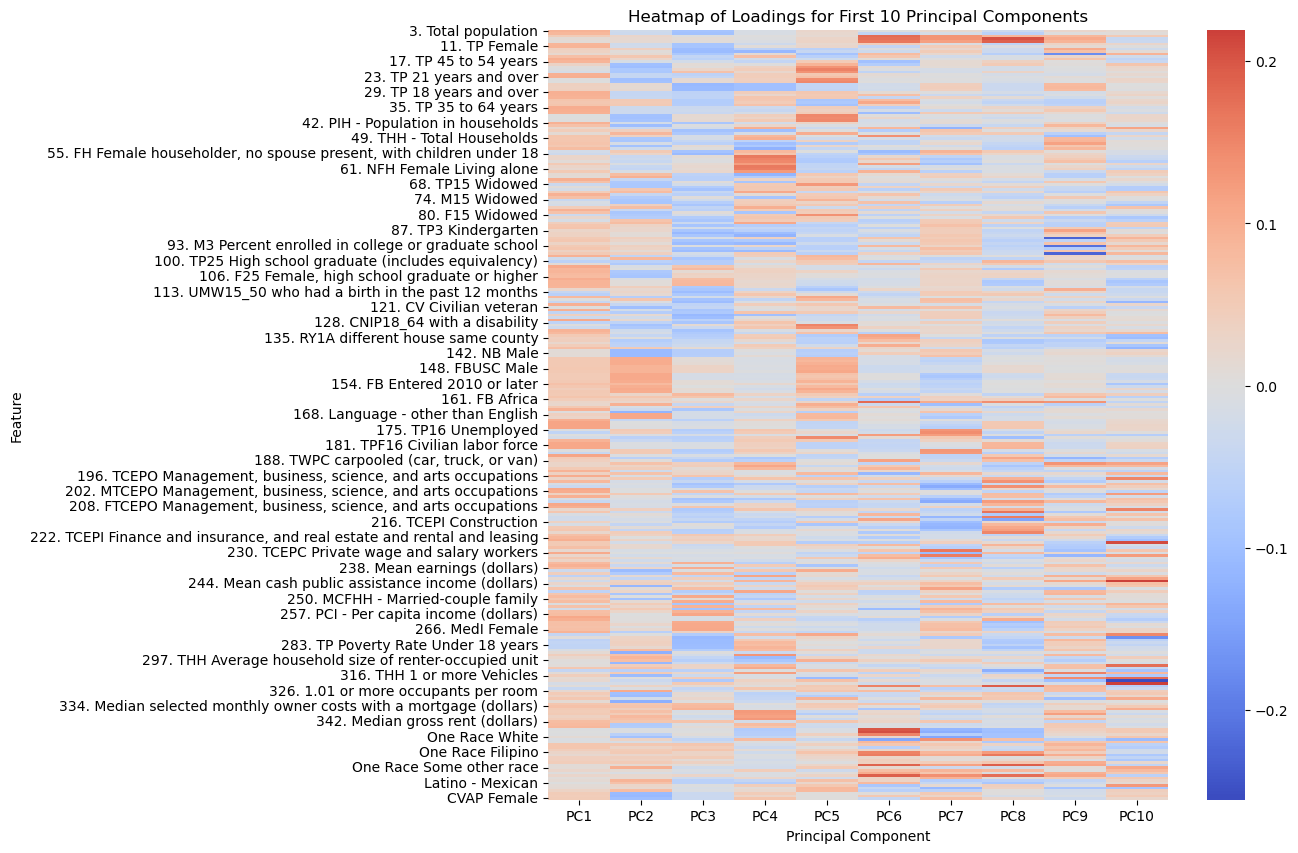

In [61]:
import seaborn as sns

# Get the loadings for the first 10 principal components
loadings_10 = pd.DataFrame(pca.components_[:10, :], columns=X.columns, index=[f"PC{i+1}" for i in range(10)])

# Create a heatmap of the loadings
plt.figure(figsize=(10, 10))
sns.heatmap(loadings_10.T, cmap="coolwarm", center=0)
plt.title('Heatmap of Loadings for First 10 Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Feature')
plt.show()


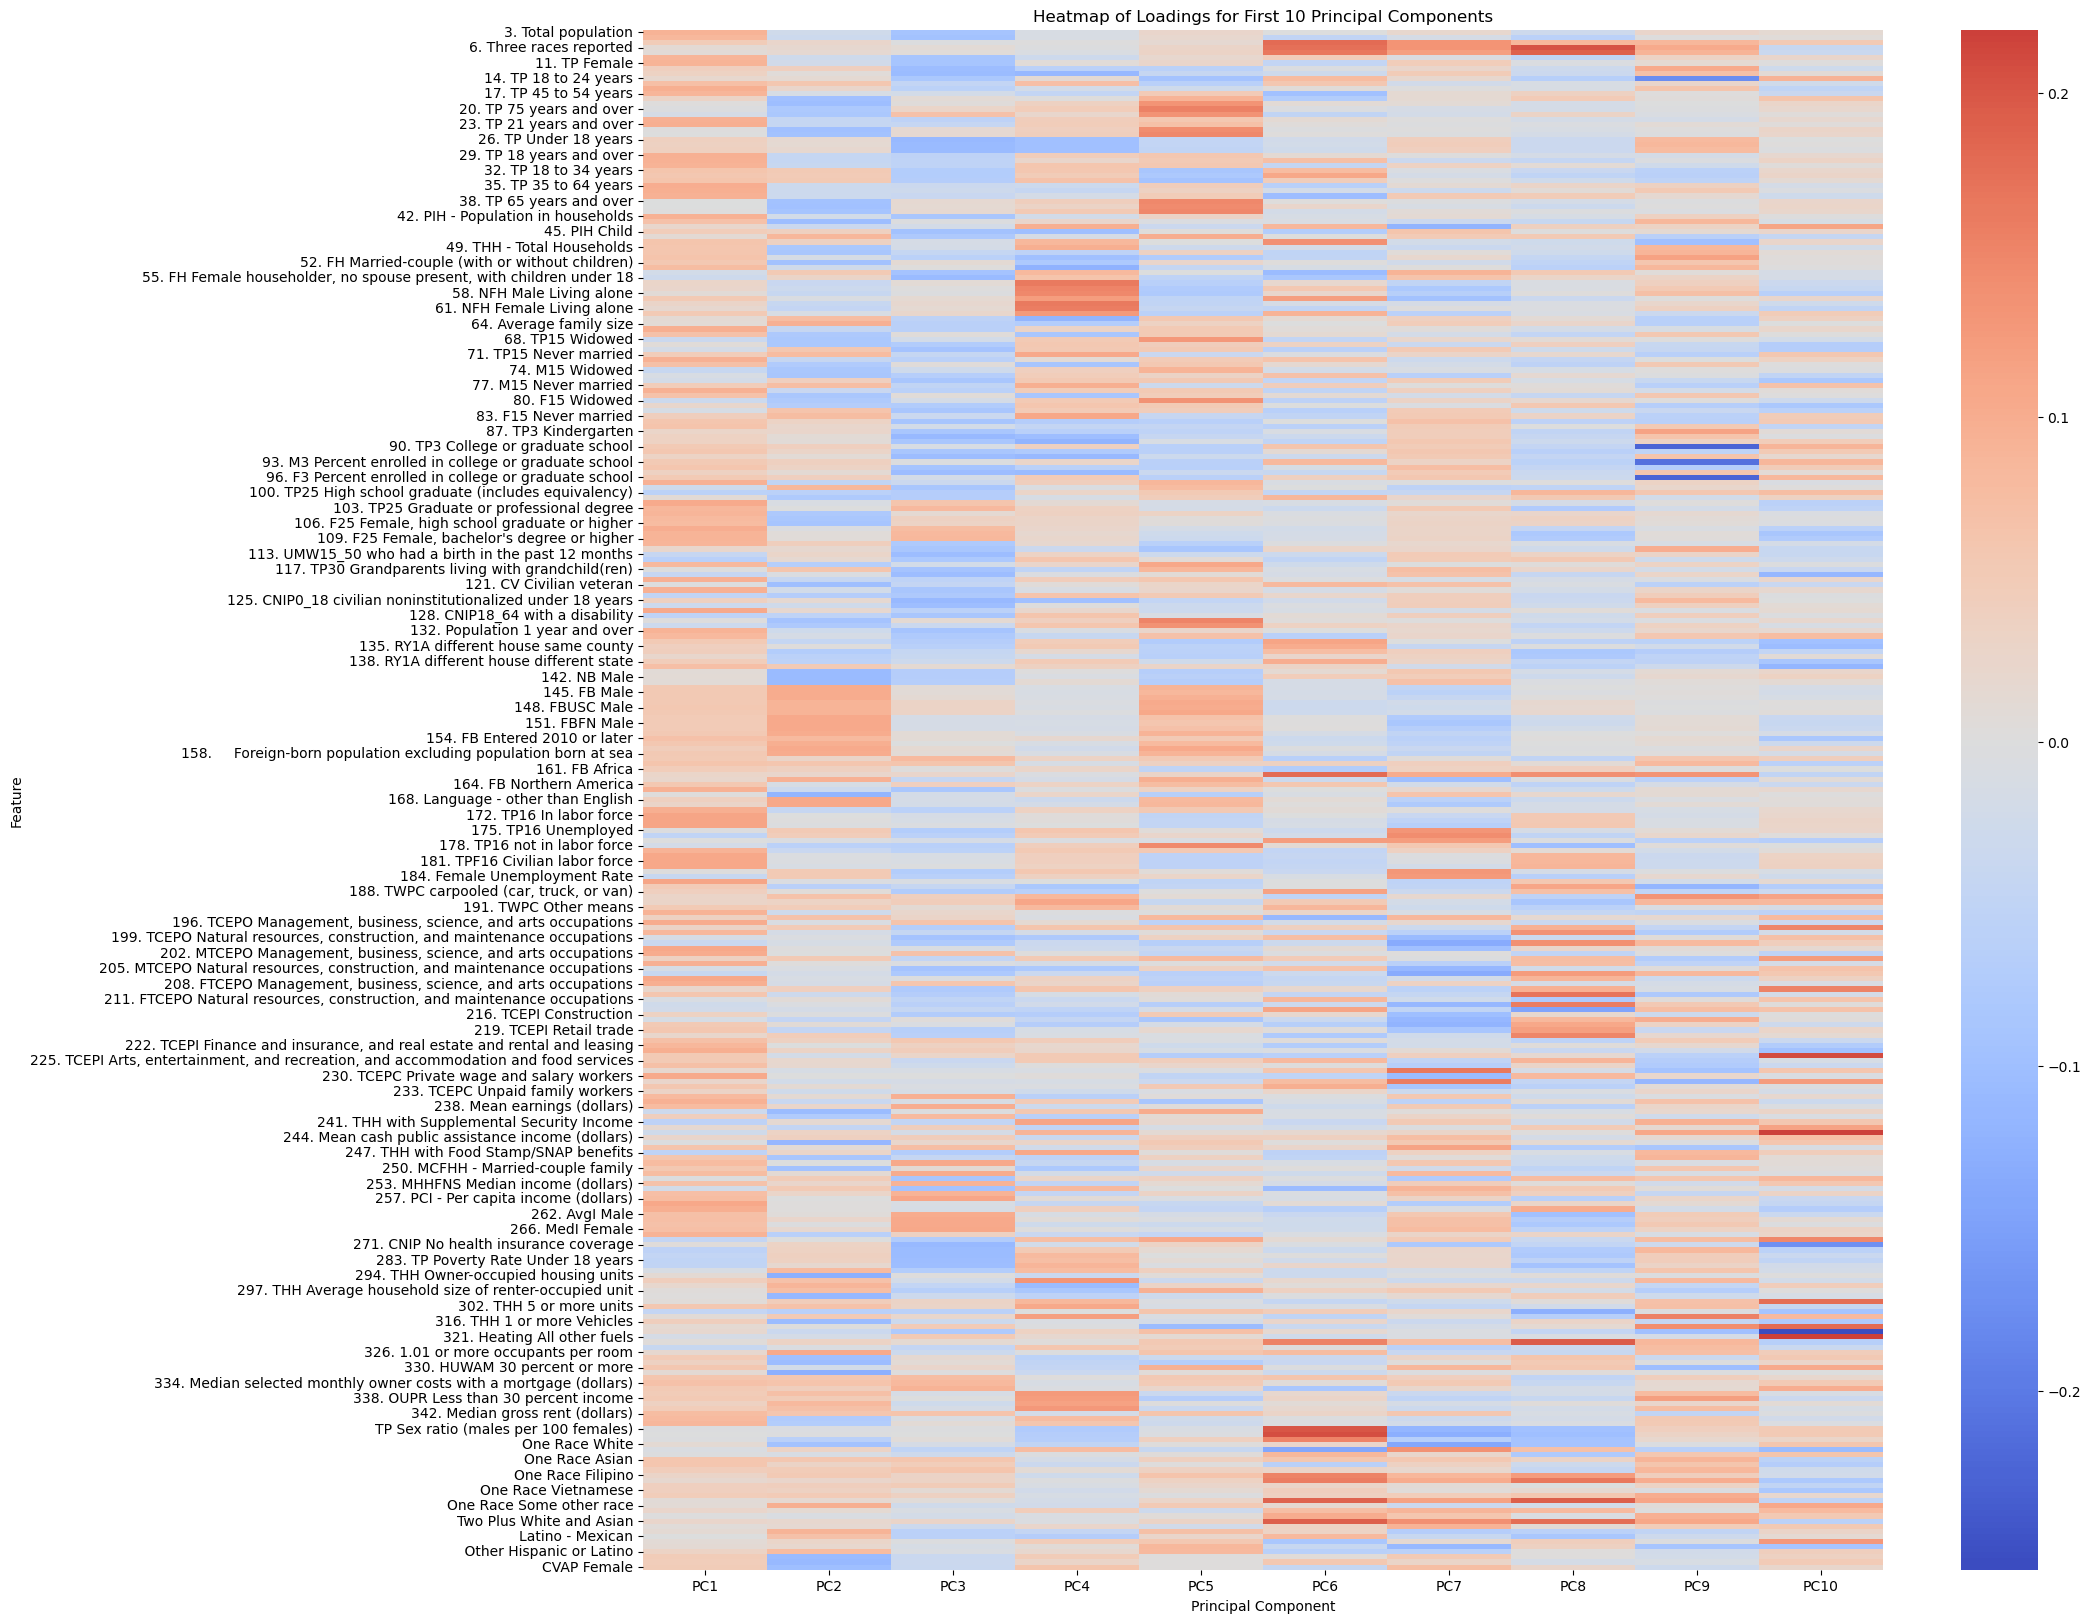

In [59]:
# Create a larger heatmap of the loadings
plt.figure(figsize=(20, 20))
sns.heatmap(loadings_10.T, cmap="coolwarm", center=0)
plt.title('Heatmap of Loadings for First 10 Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Feature')
plt.show()
